Import Dependencies and Set Up Spark

In [13]:
from pyspark.sql import SparkSession
from src.data_loader import load_data
from src.preprocessing import preprocess_data
from src.model_training import train_models
from src.evaluation import evaluate_model
from pyspark.sql import functions as F
from src.graphs import (
    plot_top_tfidf_words,
    plot_logreg_weights,
    plot_rf_feature_importance,
    plot_nb_informative_words,
    plot_model_comparison
)

# Start Spark session
spark = SparkSession.builder.appName("Sentiment140 Final Notebook").getOrCreate()


Load and Inspect the Data

In [14]:
df = load_data("training.1600000.processed.noemoticon.csv", sample_fraction=0.1)
# Show 10 random rows
df.orderBy(F.rand()).show(10, truncate=80)



25/07/30 23:25:07 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+--------------------------------------------------------------------------------+-----+
|                                                                            text|label|
+--------------------------------------------------------------------------------+-----+
|@JonathanRKnight Care to share why your day went so well? We're interested in...|    1|
|today is hot,too.  the design exhibition  so big that i tired......  http://p...|    0|
|                        Ahh! just smashed a lamp! im soo fucking clumsy tonight |    0|
|@punchmolly37 ahhhh oldschool! i still wear that around sometimes, Nightbeast...|    1|
|@gembemjellybean I still cant understand why ya went back to him...  Poor Gem...|    0|
|               @razzberrigrl summers the best! On winter here!! Enjoy the trip! |    1|
|                      @RoxanneWilder live a little...have a dog and a cold beer |    1|
|          @jessjessbobess that's too mean.  and you didn't respond to my text.  |    0|
|         @dslat13 Be

Preprocess the Data


In [15]:
processed_df, pipeline_model = preprocess_data(df)
processed_df.show(5, truncate=False)


+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|features                                                                                                                                                                                                                                                                                                                                                         |
+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Train the Models

In [16]:
trained_models = train_models(processed_df)


25/07/30 23:26:17 WARN MemoryStore: Not enough space to cache rdd_790_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:26:17 WARN BlockManager: Persisting block rdd_790_1 to disk instead.
25/07/30 23:26:18 WARN MemoryStore: Not enough space to cache rdd_790_0 in memory! (computed 294.5 MiB so far)
25/07/30 23:26:18 WARN BlockManager: Persisting block rdd_790_0 to disk instead.
25/07/30 23:26:31 WARN MemoryStore: Not enough space to cache rdd_790_1 in memory! (computed 294.5 MiB so far)
25/07/30 23:26:32 WARN MemoryStore: Not enough space to cache rdd_790_0 in memory! (computed 294.5 MiB so far)
25/07/30 23:26:39 WARN MemoryStore: Not enough space to cache rdd_790_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:26:39 WARN MemoryStore: Not enough space to cache rdd_790_0 in memory! (computed 196.3 MiB so far)
25/07/30 23:26:46 WARN MemoryStore: Not enough space to cache rdd_790_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:26:46 WARN MemoryStore: Not enough space to cache

 Evaluate Models with Accuracy, Precision, Recall, F1


In [17]:
# Split the data first
train_df, test_df = processed_df.randomSplit([0.8, 0.2], seed=42)

# Train models
trained_models = train_models(train_df)

# Evaluate each model, print results, and collect metrics
results = {}

for model_name, model_bundle in trained_models.items():
    print(f"\n--- {model_name} ---")
    metrics = evaluate_model(model_bundle["model"], test_df)
    results[model_name] = metrics


25/07/30 23:27:59 WARN MemoryStore: Not enough space to cache rdd_952_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:27:59 WARN BlockManager: Persisting block rdd_952_1 to disk instead.
25/07/30 23:27:59 WARN MemoryStore: Not enough space to cache rdd_952_0 in memory! (computed 196.3 MiB so far)
25/07/30 23:27:59 WARN BlockManager: Persisting block rdd_952_0 to disk instead.
25/07/30 23:28:10 WARN MemoryStore: Not enough space to cache rdd_952_1 in memory! (computed 294.5 MiB so far)
25/07/30 23:28:10 WARN MemoryStore: Not enough space to cache rdd_952_0 in memory! (computed 130.6 MiB so far)
25/07/30 23:28:15 WARN MemoryStore: Not enough space to cache rdd_952_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:28:16 WARN MemoryStore: Not enough space to cache rdd_952_0 in memory! (computed 196.3 MiB so far)
25/07/30 23:28:22 WARN MemoryStore: Not enough space to cache rdd_952_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:28:22 WARN MemoryStore: Not enough space to cache


--- LogisticRegression ---


/workspaces/NC-Assignment-MOD006902-2024-5/venv/lib/python3.10/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(



Model Evaluation Results:
Accuracy : 0.7194
Precision: 0.7130
Recall   : 0.7268
F1 Score : 0.7198

Confusion Matrix:
DenseMatrix([[11512.,  4654.],
             [ 4347., 11564.]])

--- NaiveBayes ---



Model Evaluation Results:
Accuracy : 0.7144
Precision: 0.7169
Recall   : 0.7013
F1 Score : 0.7090

Confusion Matrix:
DenseMatrix([[11759.,  4407.],
             [ 4753., 11158.]])

--- RandomForest ---



Model Evaluation Results:
Accuracy : 0.6932
Precision: 0.6561
Recall   : 0.8016
F1 Score : 0.7216

Confusion Matrix:
DenseMatrix([[ 9482.,  6684.],
             [ 3157., 12754.]])


Interpretability Visualisations

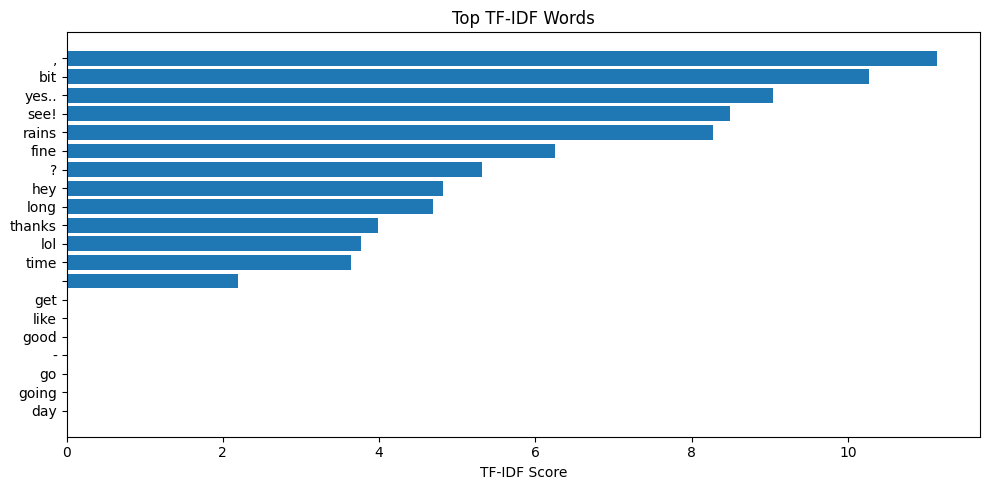

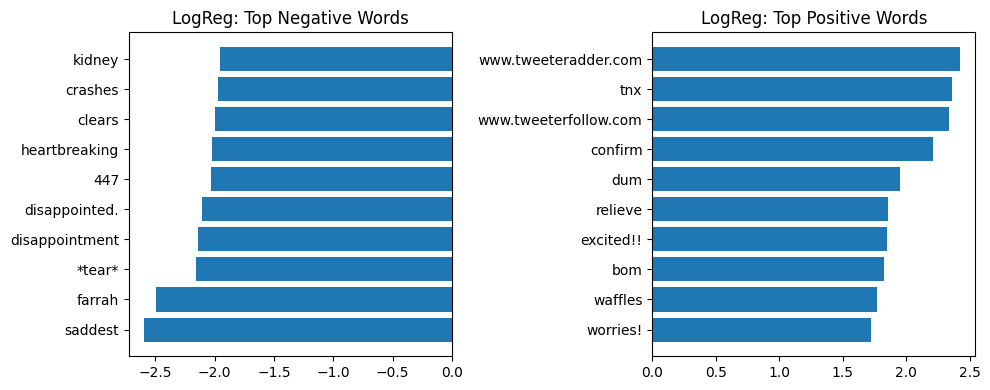

25/07/30 23:30:24 WARN MemoryStore: Not enough space to cache rdd_1226_0 in memory! (computed 196.3 MiB so far)
25/07/30 23:30:24 WARN BlockManager: Persisting block rdd_1226_0 to disk instead.
25/07/30 23:30:24 WARN MemoryStore: Not enough space to cache rdd_1226_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:30:24 WARN BlockManager: Persisting block rdd_1226_1 to disk instead.
25/07/30 23:30:47 WARN MemoryStore: Not enough space to cache rdd_1226_1 in memory! (computed 294.5 MiB so far)
25/07/30 23:30:48 WARN MemoryStore: Not enough space to cache rdd_1226_0 in memory! (computed 294.5 MiB so far)
25/07/30 23:30:55 WARN MemoryStore: Not enough space to cache rdd_1226_0 in memory! (computed 196.3 MiB so far)
25/07/30 23:30:55 WARN MemoryStore: Not enough space to cache rdd_1226_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:31:05 WARN MemoryStore: Not enough space to cache rdd_1226_1 in memory! (computed 196.3 MiB so far)
25/07/30 23:31:05 WARN MemoryStore: Not enough space

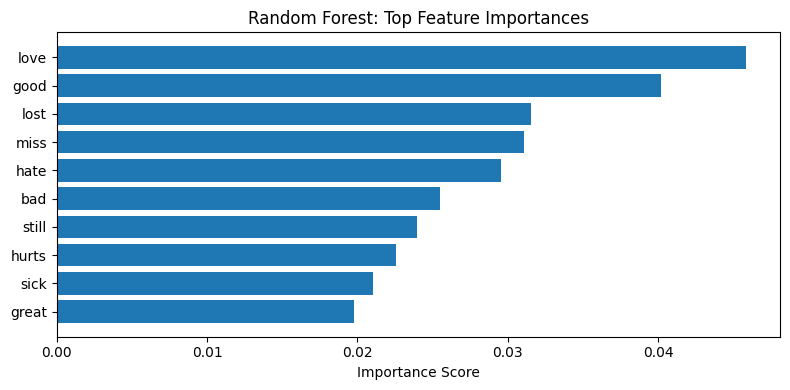

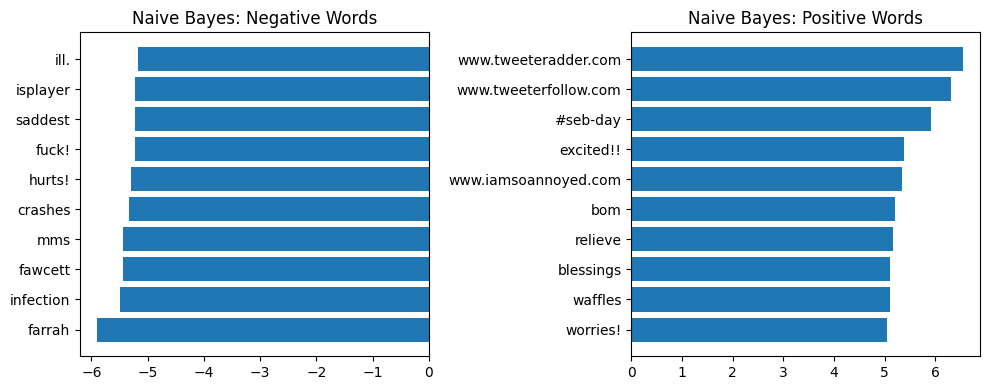

In [19]:
# Visualizing TF-IDF and Model Insights
plot_top_tfidf_words(df)
plot_logreg_weights(df)
plot_rf_feature_importance(df)
plot_nb_informative_words(df)
